## Q28 仿射变换

利用仿射变换让图像在x方向上+30，在y方向上-30吧

仿射变换利用3x3的矩阵来进行图像变换。

变换的方式有**平行移动**（问题28）、**放大缩小**（问题29）、**旋转**（问题30）、**倾斜**（问题31）等。

原图像记为(x,y)，变换后的图像记为(x',y')。
[参考](https://www.cnblogs.com/happystudyeveryday/p/10547316.html)
[参考2](https://blog.csdn.net/martinkeith/article/details/89211033)

$$\left[\begin{array}{l}{x}^{\prime} \\ {y}^{\prime} \\ {1}\end{array}\right]=\left[\begin{array}{lll}{a_{1}} & {a_{2}} & {t_{x}} \\ {a_{3}} & {a_{4}} & {t_{y}} \\ {0} & {0} & {1}\end{array}\right]\left[\begin{array}{l}{x} \\ {y} \\ {1}\end{array}\right]$$

其中$t_{y}$ 与 $t_{x}$ 表示平移量， 参数$a_{i}$ 表示图像的旋转与缩放

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'img_out')

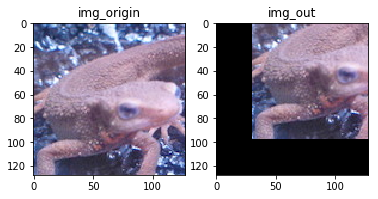

In [13]:
# Q28 平移
img = cv2.imread("gg.jpg")
img_origin = img.copy()
H, W, C = img.shape


afine = [[1, 0, 1],
         [0, 1, 1],
         [0, 0, 1]]

# afine
a1 = 1.
a2 = 0.
a3 = 0.
a4 = 1.
tx = 30
ty = -30

# 构造坐标
y = np.arange(H).repeat(W).reshape(H, -1)  ## 注意
x = np.tile(np.arange(W), (H, 1))

img_out = np.zeros((H+1, W+1, C), dtype=np.float32)

x_new = a1 * x + a2 * y + tx
y_new = a3 * x + a4 * y + ty

x_new = np.minimum(np.maximum(x_new, 0), W).astype(np.int)
y_new = np.minimum(np.maximum(y_new, 0), H).astype(np.int)

img_out[y_new, x_new] = img[y, x]
img_out = img_out[:H, :W]
img_out = img_out.astype(np.uint8)

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(122)
plt.imshow(img_out)
plt.title("img_out")

### Q29 仿射变换(放大缩小)

1. 使用仿射变换，将图片在x方向上放大1.3倍，在y方向上缩小至0.8倍。
2. 在上面的条件下，同时在x方向上像右平移30（+30），在y方向上向上平移30（-30）。

In [17]:
# Q29 放缩
_img = cv2.imread("gg.jpg")
img_origin = _img.copy()
H, W, C = _img.shape



# afine
a1 = 1.3
a2 = 0.
a3 = 0.
a4 = 0.8
tx = 30
ty = -30

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H * a4).astype(np.int)
W_new = np.round(W * a1).astype(np.int)
img_out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

a = a1 * a4 - a2 * a3
x = np.round((a4 * x_new - a2 * y_new) / a).astype(np.int) - tx + 1
y = np.round((-a3 * x_new + a1 * y_new) / a).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

img_out[y_new, x_new] = img[y, x]

img_out = img_out[:H, :W]
img_out = img_out.astype(np.uint8)

cv2.imshow("img_out", img_out)
cv2.waitKey()


-1

### Q30 旋转
* 使用仿射变换，逆时针旋转30度。
* 使用仿射变换，逆时针旋转30度并且能让全部图像显现（也就是说，单纯地做仿射变换会让图片边缘丢失，这一步中要让图像的边缘不丢失，需要耗费一些工夫）。
* 使用下面的式子进行逆时针方向旋转A度的仿射变换：

```
  x'       cosA -sinA tx    x
[ y' ] = [ sinA  cosA ty ][ y ]
  1         0     0    1    1

```
逆变换
```
  x       cosA -sinA tx     x'
[ y ] = [ sinA  cosA ty ]‘ [ y' ]
  1        0     0    1     1
```


Text(0.5, 1.0, 'img_out')

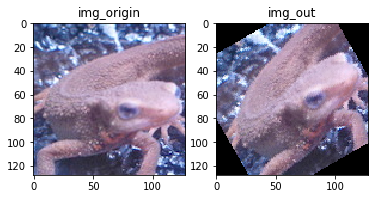

In [23]:
# Q30 旋转
_img = cv2.imread("gg.jpg")
img_origin = _img.copy()
H, W, C = img.shape


afine = [[1, 0, 1],
         [0, 1, 1],
         [0, 0, 1]]

# afine
A = 30.
theta = - np.pi * A / 180.

a1 = np.cos(theta)
a2 = -np.sin(theta)
a3 = np.sin(theta)
a4 = np.cos(theta)
tx = 0
ty = 0

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)

img_out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

a = a1 * a4 - a2 * a3
x = np.round((a4 * x_new - a2 * y_new) / a).astype(np.int) - tx + 1
y = np.round((-a3 * x_new + a1 * y_new) / a).astype(np.int) - ty + 1

d_cx = (x.max() + x.min()) // 2 - W //2
d_cy = (y.max() + y.min()) //2 - H //2

x = x - d_cx
y = y - d_cy

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

img_out[y_new, x_new] = img[y, x]

img_out = img_out[:H, :W]
img_out = img_out.astype(np.uint8)

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(122)
plt.imshow(img_out)
plt.title("img_out")


### Q31 倾斜
1. 使用仿射变换，输出（1）那样的x轴倾斜30度的图像（dx=30），这种变换被称为X-sharing
2. 使用仿射变换，输出（2）那样的y轴倾斜30度的图像（dy=30），这种变换被称为Y-sharing
3. 使用仿射变换，输出（3）那样的x轴、y轴都倾斜30度的图像(dx = 30, dy = 30)

```
(1) X-sharing                  (2) Y-sharing
   a = dx / h                     a = dy / w

  x'       1 a tx    x           x'       1 0 tx    x
[ y' ] = [ 0 1 ty ][ y ]       [ y' ] = [ a 1 ty ][ y ]
  1        0 0  1    1           1        0 0  1    1
```

**代码有误**

Text(0.5, 1.0, 'img_out')

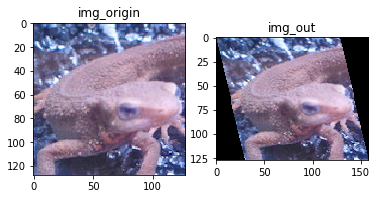

In [53]:
# Q31 倾斜
_img = cv2.imread("gg.jpg")
img_origin = _img.copy()
H, W, C = _img.shape

# afine
dx = 30.
dy = 0.

a1 = 1.
a2 = dx / H
a3 = dy / W
a4 = 1.
tx = 0
ty = 0

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

# np.ceil计算大于等于改值的最小整数
H_new = np.ceil(H + dy).astype(np.int)
W_new = np.ceil(W + dx).astype(np.int)
img_out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

a = a1 * a4 - a2 * a3
x = np.round((a4 * x_new - a2 * y_new) / a).astype(np.int) - tx + 1
y = np.round((-a3 * x_new + a1 * y_new) / a).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

img_out[y_new, x_new] = img[y, x]

# img_out = img_out[:H, :W]
img_out = img_out.astype(np.uint8)

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(122)
plt.imshow(img_out)
plt.title("img_out")